In [1]:
# Importing required packages
import rasterio
import fiona
import numpy as np
import glob
from IPython.display import Image, display
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
/home/jason/anaconda3/envs/ai4e/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


### Checking images

In [2]:
! cd /media/disk2/datasets/maaryland_naip_2017/; ls

38075  38076  38077  39075  39076  39077


In [6]:
MDDIR = "../../../media/disk2/datasets/maaryland_naip_2017/39077/*.jpg"
allImages = glob.glob(MDDIR)

In [7]:
allImages

['../../../media/disk2/datasets/maaryland_naip_2017/39077/m_3907721_nw_18_1_20170628.200.jpg',
 '../../../media/disk2/datasets/maaryland_naip_2017/39077/m_3907719_ne_18_1_20170628.200.jpg',
 '../../../media/disk2/datasets/maaryland_naip_2017/39077/m_3907719_nw_18_1_20170628.200.jpg',
 '../../../media/disk2/datasets/maaryland_naip_2017/39077/m_3907721_se_18_1_20170628.200.jpg',
 '../../../media/disk2/datasets/maaryland_naip_2017/39077/m_3907721_sw_18_1_20170628.200.jpg',
 '../../../media/disk2/datasets/maaryland_naip_2017/39077/m_3907717_sw_18_1_20170628.200.jpg',
 '../../../media/disk2/datasets/maaryland_naip_2017/39077/m_3907718_se_18_1_20170630.200.jpg',
 '../../../media/disk2/datasets/maaryland_naip_2017/39077/m_3907720_nw_18_1_20170628.200.jpg',
 '../../../media/disk2/datasets/maaryland_naip_2017/39077/m_3907717_nw_18_1_20170628.200.jpg',
 '../../../media/disk2/datasets/maaryland_naip_2017/39077/m_3907720_ne_18_1_20170628.200.jpg',
 '../../../media/disk2/datasets/maaryland_naip_201

../../../media/disk2/datasets/maaryland_naip_2017/39077/m_3907719_sw_18_1_20170628.200.jpg


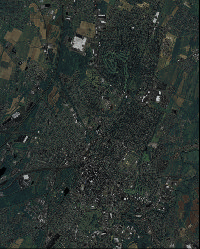

../../../media/disk2/datasets/maaryland_naip_2017/39077/m_3907719_sw_18_1_20170628.200.jpg


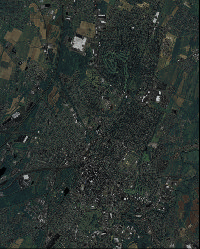

../../../media/disk2/datasets/maaryland_naip_2017/39077/m_3907719_se_18_1_20170628.200.jpg


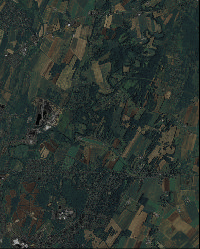

../../../media/disk2/datasets/maaryland_naip_2017/39077/m_3907718_sw_18_1_20170710.200.jpg


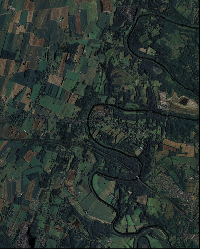

../../../media/disk2/datasets/maaryland_naip_2017/39077/m_3907717_sw_18_1_20170628.200.jpg


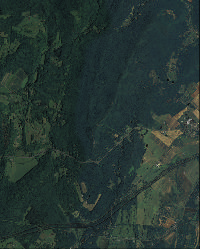

../../../media/disk2/datasets/maaryland_naip_2017/39077/m_3907718_ne_18_1_20170630.200.jpg


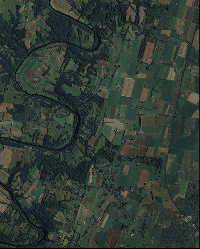

../../../media/disk2/datasets/maaryland_naip_2017/39077/m_3907717_ne_18_1_20170628.200.jpg


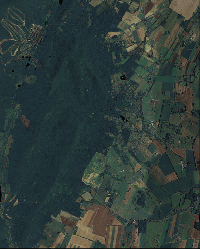

../../../media/disk2/datasets/maaryland_naip_2017/39077/m_3907719_sw_18_1_20170628.200.jpg


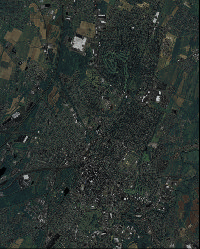

../../../media/disk2/datasets/maaryland_naip_2017/39077/m_3907717_sw_18_1_20170628.200.jpg


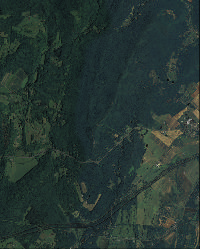

../../../media/disk2/datasets/maaryland_naip_2017/39077/m_3907717_se_18_1_20170628.200.jpg


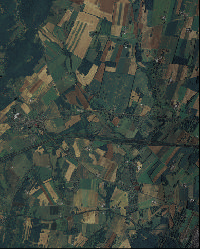

In [9]:
for i in range(10):
    img = np.random.choice(allImages)
    print(img)
    display(Image(filename=img))

m_3907719_sw_18_1_20170628

m_3807538_nw_18_1_20170611.mrf

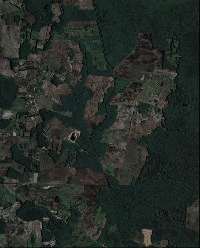

In [21]:
display(Image(filename="../../../media/disk2/datasets/maaryland_naip_2017/38075/m_3807538_nw_18_1_20170611.200.jpg"))

../../../media/disk2/datasets/maaryland_naip_2017/38075/m_3807538_nw_18_1_20170611.mrf

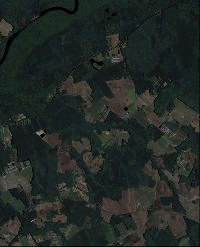

In [22]:
display(Image(filename="../../../media/disk2/datasets/maaryland_naip_2017/38075/m_3807561_nw_18_1_20170611.200.jpg"))

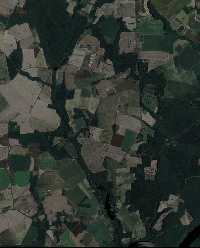

In [23]:
display(Image(filename="../../../media/disk2/datasets/maaryland_naip_2017/38075/m_3807527_nw_18_1_20170611.200.jpg"))

### Chicken

In [3]:
with fiona.open("Delmarva_PL_House_Final/Delmarva_PL_House_Final.shp") as source:
    print(f"CRS: {source.crs}; Bounds: {source.bounds}\n")
    print(source[0]['geometry'])

CRS: {'init': 'epsg:32618'}; Bounds: (398239.74870000035, 4135212.1492000017, 489763.1383059655, 4377752.86461776)

{'type': 'Polygon', 'coordinates': [[(441154.14219999965, 4180879.3373999987, 0.0), (441055.5848000003, 4180763.5819000024, 0.0), (441044.3399, 4180772.180900002, 0.0), (441142.2360000005, 4180887.2749000024, 0.0), (441154.14219999965, 4180879.3373999987, 0.0)]]}


In [ ]:
with rasterio.open("../tiles/m_3807509_ne_18_1_20170709.mrf") as source:
    print(f"CRS: {source.crs}; Bounds: {source.bounds}\n")
    print(source[0]['geometry'])

# Rasterize

In [14]:
import rasterio
import subprocess
f = rasterio.open("../../../media/disk2/datasets/maaryland_naip_2017/38075/m_3807536_se_18_1_20170611.mrf","r")
left, bottom, right, top = f.bounds
crs = f.crs.to_string()
height, width = f.height, f.width
f.close()

In [15]:
print(left, bottom, right, top)
print(crs)
print(width, height)

450554.0 4247228.0 456676.0 4254820.0
EPSG:26918
6122 7592


In [16]:
command = [
    "gdal_rasterize",
    "-ot", "Byte",
    "-burn", "1.0",
    "-of", "GTiff",
    "-te", str(left), str(bottom), str(right), str(top),
    "-ts", str(width), str(height),
    "-co", "COMPRESS=LZW",
    "-co", "BIGTIFF=YES",
    "./chicken_mask_3807536_se.shp",
    "./m_3807536_se_18_1_20170611_rasterized4.tif"
]
subprocess.call(command)

0